In [1]:
!wget "https://raw.githubusercontent.com/mka2011/Computer-vision/main/pic1.png"

--2021-01-23 21:16:57--  https://raw.githubusercontent.com/mka2011/Computer-vision/main/pic1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 316906 (309K) [image/png]
Saving to: ‘pic1.png.1’

pic1.png.1          100%[===================>] 309.48K  --.-KB/s    in 0.02s   

2021-01-23 21:16:57 (12.5 MB/s) - ‘pic1.png.1’ saved [316906/316906]



In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#Question 1

In [3]:
""" Question 1"""
img = cv2.imread("pic1.png")
img2 = np.copy(img)
print(img.shape)

(310, 408, 3)


# Question 2 Part A



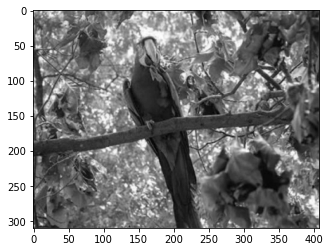

In [4]:
"""Question 2 part a"""
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray2 = np.copy(gray)
plt.imshow(gray,"gray")

# Question 2 Part B



In [6]:
indiceRow = list()
indiceCol = list()
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        if int(gray[i][j]) == 6:
            indiceRow.append(i)
            indiceCol.append(j)
print("Indices of pixel value 6 in grayscale image is : ",indiceRow,indiceCol)   

indiceRow2 = list()
indiceCol2 = list()
indiceDim2 = list()
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for k in range(img.shape[2]):
            if (img[i][j][k]) == 6:
                indiceRow2.append(i)
                indiceCol2.append(j)
                indiceDim2.append(k)
print("Indices of pixel value 6 in color image is : ",indiceRow2,indiceCol2,indiceDim2)

Indices of pixel value 6 in grayscale image is :  [] []
Indices of pixel value 6 in color image is :  [147, 151, 153, 156, 190, 274, 277] [262, 148, 149, 151, 172, 285, 285] [0, 2, 2, 2, 2, 0, 0]


#Question 2 Part C

In [7]:
"""Question 2 Part c"""
dpixel = np.min(gray)
dpixel2 = np.min(img)
print("The darkest pixel in grayscale and color image is : ",dpixel," and ",dpixel2)

The darkest pixel in grayscale and color image is :  9  and  4


#Question 2 Part D (GRAYSCALE)

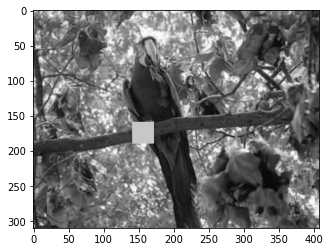

In [8]:
"""Question 2 Part D"""
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        if (gray[i][j]) == dpixel:
            i2 = i - 31
            j2 = j - 31
            for i3 in range(i2,i,1):
                for j3 in range(j2,j,1):
                    gray[i3][j3] = 200
plt.imshow(gray,"gray")

#Question 2 Part D (COLORED)

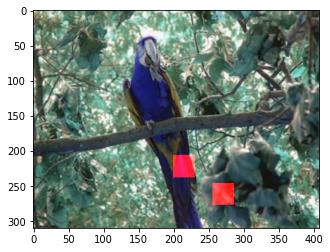

In [10]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for k in range(img.shape[2]):
            if (img[i][j][k]) == dpixel2:
                i2 = i - 31
                j2 = j - 31
                for i3 in range(i2,i,1):
                    for j3 in range(j2,j,1):
                        img[i3][j3][k] = 255
plt.imshow(img)

#Question 2 Part E

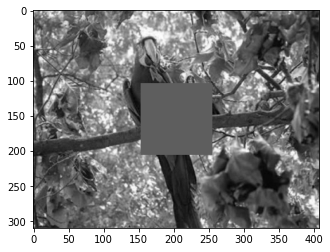

In [9]:
"""#Question 2 Part E"""
midr = gray.shape[0]//2
midc = gray.shape[1]//2
startr = midr - 51
startc = midc - 51
for i in range(startr,midr+51,1):
    for j in range(startc,midc+51,1):
        gray2[i][j] = 100
plt.imshow(gray2,"gray")

#Question 3

In [11]:
avg = list()
for k in range(3):
    sum = 0
    for i in range(img2.shape[0]):
        for j in range(img2.shape[1]):
            sum += img2[i][j][k]
    avg.append(sum//(img2.shape[0]*img2.shape[1]))
print(avg)

[93, 114, 104]


Displaying original image


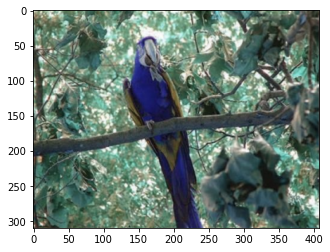

In [12]:
print("Displaying original image")
plt.imshow(img2,"gray")

Displaying image after edit


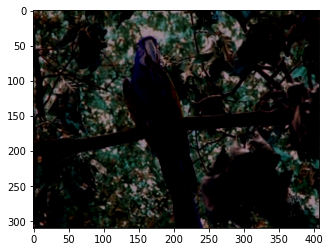

In [13]:
img3 = np.copy(img2)
for k in range(3):
    for i in range(img2.shape[0]):
        for j in range(img2.shape[1]):
            if img2[i][j][k] - avg[k] <= 0:
                img3[i][j][k] = 0
            else:
                img3[i][j][k] = img2[i][j][k] - avg[k]
plt.imshow(img3,"gray")
print("Displaying image after edit")

#Question 4 Part A

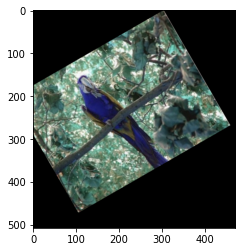

In [30]:
"""Rotating image by 30 degrees"""
img4 = cv2.imread('pic1.png')

h, w = img4.shape[0], img4.shape[1]
cY, cX = h//2, w//2

rotMatrix = cv2.getRotationMatrix2D((cY, cX), 30, 1.0)

cosAng = np.abs(rotMatrix[0][0])
sinAng = np.abs(rotMatrix[0][1])

newH = int((h * sinAng) + (w * cosAng))
newW = int((h * cosAng) + (w * sinAng))

rotMatrix[0][2] += (newW/2) - cX
rotMatrix[1][2] += (newH/2) - cY

rotated = cv2.warpAffine(img4, rotMatrix, (newW, newH))
plt.imshow(rotatedImage,"gray")

#Question 4 Part B


In [36]:
"""Scaling image"""
img5 = np.copy(img2)
width = int(img5.shape[1] * 2)
height = int(img5.shape[0] * 2)
scaled = cv2.resize(img5,(width,height),interpolation = cv2.INTER_AREA)
print("The size of image was : ",img5.shape," and the size of scaled image is : ",scaled.shape)


The size of image was :  (310, 408, 3)  and the size of scaled image is :  (620, 816, 3)


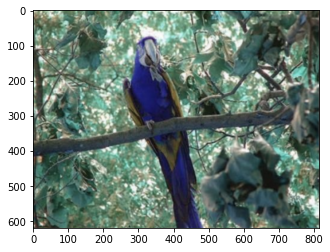

In [37]:
plt.imshow(scaled,"gray")

#Question 4 Part C

original image


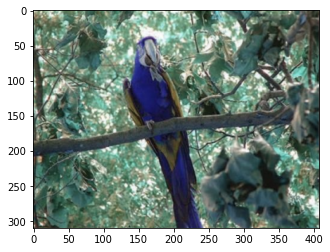

In [63]:
'''Shifting center'''
img6 = np.copy(img2)
for i in range(img2.shape[0]-10):
  for j in range(img2.shape[1]-10):
    img6[i+10][j+10] = img2[i][j]
    if i <= 10 or j <= 10:
      img6[i][j] = 0


print("original image")
plt.imshow(img2,"gray")

Edited image


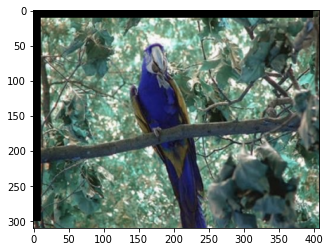

In [64]:
print("Edited image")
plt.imshow(img6,"gray")

#Question 4 Part D


original image


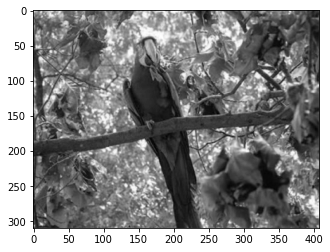

In [44]:
"""Canny edge detection"""
img7 = cv2.imread('pic1.png',0)
edgeDetect = cv2.Canny(img7,100,200)
print("original image")
plt.imshow(img7,"gray")

Edge detected image


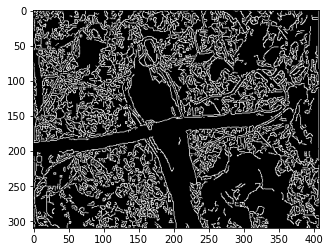

In [45]:
print("Edge detected image")
plt.imshow(edgeDetect,"gray")